In [1]:
# librerie necessarie
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.2)
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
from scipy.stats import pearsonr, spearmanr

In [2]:
%%html
<style>  
h1.t1{
    font-size: 2.5em;
    font-weight: bold;
    color: #222;
    margin-bottom: 8px;
}

h2.t2 {
    font-size: 2em;  
    font-weight: bold;       
    color: #222;             
    margin-bottom: 8px;      
}

ul.clist {
    list-style: none; 
    padding-left: 0;
}

ul.clist li {
    position: relative;
    background: #f9f9f9; 
    border: 1px solid #eee;
    border-radius: 6px;
    padding: 17px 14px;
    margin: 8px 0;
    font-size: 17px;
    color: #333;
    transition: background 0.2s ease;
}

ul.clist li:hover {
    background: #f0f4ff;
}

p.par{
    font-size: 1.5em;
}

hr.d{
    border:0;
    height:2px;
    background:#e6e9ef;
    width:30%;    
    margin:.4em 0 1em;
    margin-left:0;
    border-radius:2px;
}    
</style>

<div>
    <h1 class = "t1">Evoluzione dell'industria Anime nel tempo</h1>
    <hr class = "d">
    <h4><b>Realizzato da:</b> Marchetti Gabriele</h4>
</div>

<div>
    <h2 class = "t2">Cosa vogliamo scoprire</h2>
    <ul class="clist">
        <li>Come si è evoluta la produzione di Anime nel corso del tempo?</li>
        <li>La valutazione di un Anime è correlata alla sua popolarità?</li>
        <li>Quali sono i generi più presenti nell’industria?</li>
        <li>Qual è il formato di Anime più apprezzato?</li>
    </ul>
</div>

<div>
    <h4><b>Dataset utilizzato:</b> 
        <a href = "https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset" target = "_blank">Dataset Anime 2023 - Kaggle</a>
    </h4>
    <h4><b>Autore del dataset:</b> Sajid, pubblicato nel 2023</h4>
    <h2 class = "t2">Dati considerati per l'analisi:</h2>
    <ul class = "clist">
        <li>Aired: le date di pubblicazione e di fine pubblicazione dell'anime</li>
        <li>Score: la valutazione media dell'anime</li>
        <li>Genres: i generi dell'anime</li>
        <li>Type: il formato dell'anime (es. Film, serie TV, OVA, ONA, etc.)</li>
        <li>Members: numero di persone che hanno aggiunto l'anime tra le serie seguite</li>
        <li>Anime_id: identificatore univoco per ciascun anime</li>
    </ul>
</div>

<style>

ul.pretty-list {
  list-style: none;        /* tolgo i puntini */
  padding-left: 0;
}
ul.pretty-list li {
  position: relative;
  background: #f9f9f9;     /* sfondo leggero */
  border: 1px solid #eee;
  border-radius: 6px;
  padding: 10px 14px 10px 36px;  /* spazio per l’icona a sinistra */
  margin: 8px 0;
  font-size: 17px;
  color: #333;
  line-height: 1.5;
  transition: background 0.2s ease;
list-style-type: none
}
ul.pretty-list li:hover {
  background: #f0f4ff;     /* leggero highlight al passaggio */
}

/* Icona personalizzata al posto del pallino */
ul.pretty-list li::before {
  content: "•";            /* puoi sostituire con ✔, ➤, ▸ */
  position: absolute;
  left: 12px;
  color: #203a8e;          /* blu accento */
  font-weight: bold;
}
</style>


In [3]:
df = pd.read_csv("Dataset/anime-dataset-2023.csv")
df

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24900,55731,Wu Nao Monu,UNKNOWN,无脑魔女,UNKNOWN,"Comedy, Fantasy, Slice of Life",No description available for this anime.,ONA,15.0,"Jul 4, 2023 to ?",...,UNKNOWN,Web manga,Unknown,PG-13 - Teens 13 or older,UNKNOWN,24723,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1386/...
24901,55732,Bu Xing Si: Yuan Qi,Blader Soul,捕星司·源起,UNKNOWN,"Action, Adventure, Fantasy",No description available for this anime.,ONA,18.0,"Jul 27, 2023 to ?",...,UNKNOWN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1383/...
24902,55733,Di Yi Xulie,The First Order,第一序列,UNKNOWN,"Action, Adventure, Fantasy, Sci-Fi",No description available for this anime.,ONA,16.0,"Jul 19, 2023 to ?",...,UNKNOWN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1130/...
24903,55734,Bokura no Saishuu Sensou,UNKNOWN,僕らの最終戦争,UNKNOWN,UNKNOWN,A music video for the song Bokura no Saishuu S...,Music,1.0,"Apr 23, 2022",...,UNKNOWN,Original,3 min,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1931/...


In [4]:
# facciamo prima una copia dell'originale su cui lavorare mantenendo solo le colonne utili durante l'analisi
df_pulito = df.copy()

colonne_utili = ["anime_id", "Name", "English name", "Score", "Genres", "Type", "Aired", "Score", "Rating", "Rank", "Popularity", "Favorites", "Scored By", "Members"]
df_pulito = df_pulito[colonne_utili]


In [5]:
df_pulito

,anime_id,Name,English name,Score,Genres,Type,Aired,Score,Rating,Rank,Popularity,Favorites,Scored By,Members
0,1,Cowboy Bebop,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi",TV,"Apr 3, 1998 to Apr 24, 1999",8.75,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,8.38,"Action, Sci-Fi",Movie,"Sep 1, 2001",8.38,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978
2,6,Trigun,Trigun,8.22,"Action, Adventure, Sci-Fi",TV,"Apr 1, 1998 to Sep 30, 1998",8.22,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252
3,7,Witch Hunter Robin,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",TV,"Jul 3, 2002 to Dec 25, 2002",7.25,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931
4,8,Bouken Ou Beet,Beet the Vandel Buster,6.94,"Adventure, Fantasy, Supernatural",TV,"Sep 30, 2004 to Sep 29, 2005",6.94,PG - Children,4240.0,5126,14,6413.0,15001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24900,55731,Wu Nao Monu,UNKNOWN,UNKNOWN,"Comedy, Fantasy, Slice of Life",ONA,"Jul 4, 2023 to ?",UNKNOWN,PG-13 - Teens 13 or older,UNKNOWN,24723,0,UNKNOWN,0
24901,55732,Bu Xing Si: Yuan Qi,Blader Soul,UNKNOWN,"Action, Adventure, Fantasy",ONA,"Jul 27, 2023 to ?",UNKNOWN,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0
24902,55733,Di Yi Xulie,The First Order,UNKNOWN,"Action, Adventure, Fantasy, Sci-Fi",ONA,"Jul 19, 2023 to ?",UNKNOWN,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0
24903,55734,Bokura no Saishuu Sensou,UNKNOWN,UNKNOWN,UNKNOWN,Music,"Apr 23, 2022",UNKNOWN,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0


In [6]:
# uniamo le colonne English name e Name. Se English name = UNKNONW -> usiamo Name
df_pulito["Title"] = df_pulito["English name"]
m = df_pulito["English name"] == "UNKNOWN"
df_pulito.loc[m, "Title"] = df_pulito.loc[m, "Name"]
df_pulito

,anime_id,Name,English name,Score,Genres,Type,Aired,Score,Rating,Rank,Popularity,Favorites,Scored By,Members,Title
0,1,Cowboy Bebop,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi",TV,"Apr 3, 1998 to Apr 24, 1999",8.75,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,Cowboy Bebop
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,8.38,"Action, Sci-Fi",Movie,"Sep 1, 2001",8.38,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,Cowboy Bebop: The Movie
2,6,Trigun,Trigun,8.22,"Action, Adventure, Sci-Fi",TV,"Apr 1, 1998 to Sep 30, 1998",8.22,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,Trigun
3,7,Witch Hunter Robin,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",TV,"Jul 3, 2002 to Dec 25, 2002",7.25,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,Witch Hunter Robin
4,8,Bouken Ou Beet,Beet the Vandel Buster,6.94,"Adventure, Fantasy, Supernatural",TV,"Sep 30, 2004 to Sep 29, 2005",6.94,PG - Children,4240.0,5126,14,6413.0,15001,Beet the Vandel Buster
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24900,55731,Wu Nao Monu,UNKNOWN,UNKNOWN,"Comedy, Fantasy, Slice of Life",ONA,"Jul 4, 2023 to ?",UNKNOWN,PG-13 - Teens 13 or older,UNKNOWN,24723,0,UNKNOWN,0,Wu Nao Monu
24901,55732,Bu Xing Si: Yuan Qi,Blader Soul,UNKNOWN,"Action, Adventure, Fantasy",ONA,"Jul 27, 2023 to ?",UNKNOWN,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,Blader Soul
24902,55733,Di Yi Xulie,The First Order,UNKNOWN,"Action, Adventure, Fantasy, Sci-Fi",ONA,"Jul 19, 2023 to ?",UNKNOWN,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,The First Order
24903,55734,Bokura no Saishuu Sensou,UNKNOWN,UNKNOWN,UNKNOWN,Music,"Apr 23, 2022",UNKNOWN,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,Bokura no Saishuu Sensou


In [7]:
# possiamo togliere sia la colonna Name che English name e lasciare Title
df_pulito = df_pulito.drop(columns=["Name", "English name"])

In [8]:
# verifichiamo di non avere valori nulli o UNKNOWN in Title
print("UNKNOWN:", (df_pulito["Title"] == "UNKNOWN").sum())
print("Valori nulli :", df_pulito["Title"].isna().sum())

UNKNOWN: 0
Valori nulli : 0


In [9]:
df_backup = df_pulito.copy()

In [10]:
df_backup

,anime_id,Score,Genres,Type,Aired,Score,Rating,Rank,Popularity,Favorites,Scored By,Members,Title
0,1,8.75,"Action, Award Winning, Sci-Fi",TV,"Apr 3, 1998 to Apr 24, 1999",8.75,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,Cowboy Bebop
1,5,8.38,"Action, Sci-Fi",Movie,"Sep 1, 2001",8.38,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,Cowboy Bebop: The Movie
2,6,8.22,"Action, Adventure, Sci-Fi",TV,"Apr 1, 1998 to Sep 30, 1998",8.22,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,Trigun
3,7,7.25,"Action, Drama, Mystery, Supernatural",TV,"Jul 3, 2002 to Dec 25, 2002",7.25,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,Witch Hunter Robin
4,8,6.94,"Adventure, Fantasy, Supernatural",TV,"Sep 30, 2004 to Sep 29, 2005",6.94,PG - Children,4240.0,5126,14,6413.0,15001,Beet the Vandel Buster
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24900,55731,UNKNOWN,"Comedy, Fantasy, Slice of Life",ONA,"Jul 4, 2023 to ?",UNKNOWN,PG-13 - Teens 13 or older,UNKNOWN,24723,0,UNKNOWN,0,Wu Nao Monu
24901,55732,UNKNOWN,"Action, Adventure, Fantasy",ONA,"Jul 27, 2023 to ?",UNKNOWN,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,Blader Soul
24902,55733,UNKNOWN,"Action, Adventure, Fantasy, Sci-Fi",ONA,"Jul 19, 2023 to ?",UNKNOWN,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,The First Order
24903,55734,UNKNOWN,UNKNOWN,Music,"Apr 23, 2022",UNKNOWN,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,Bokura no Saishuu Sensou


In [11]:
#Verifichiamo non ci siano valori nulli o UNKNOWN in Score
print("Valori nulli in Score:", df_pulito["Score"].isna().sum())
print("Valori 'UNKNOWN' in Score:", (df_pulito["Score"] == "UNKNOWN").sum())

Valori nulli in Score: Score    0
Score    0
dtype: int64
Valori 'UNKNOWN' in Score: Score    9213
Score    9213
dtype: int64


In [12]:
#verifichiamo non ci siano valori nulli o UNKNOWN in Members
print("Valori nulli in Member:", df_pulito["Members"].isna().sum())
print("Valori 'UNKNOWN' in Members:", (df_pulito["Members"] == "UNKNOWN").sum())

Valori nulli in Member: 0
Valori 'UNKNOWN' in Members: 0


In [13]:
#rimuoviamo una colonna Score visto che e' duplicata
df_pulito["Score"]

,Score,Score
0,8.75,8.75
1,8.38,8.38
2,8.22,8.22
3,7.25,7.25
4,6.94,6.94
...,...,...
24900,UNKNOWN,UNKNOWN
24901,UNKNOWN,UNKNOWN
24902,UNKNOWN,UNKNOWN
24903,UNKNOWN,UNKNOWN


In [14]:
# rimuoviamo una colonna Score
df_pulito = df_pulito.loc[:, ~df_pulito.columns.duplicated()]

df_pulito["Score"] = pd.to_numeric(df_pulito["Score"].replace("UNKNOWN", np.nan), errors="coerce")
df_pulito["Members"] = pd.to_numeric(df_pulito["Members"], errors="coerce")
# elimiano righe non significative (Members > 0 e Score non nullo)
df_pulito = df_pulito.loc[(df_pulito["Members"] > 0) & df_pulito["Score"].notna()]

print("dtype Score:", df_pulito["Score"].dtype) 
print("valori nulli in Score:", df_pulito["Score"].isna().sum())
print("righe rimanenti:", df_pulito.shape[0])

dtype Score: float64
valori nulli in Score: 0
righe rimanenti: 15692


In [15]:
df_pulito

,anime_id,Score,Genres,Type,Aired,Rating,Rank,Popularity,Favorites,Scored By,Members,Title
0,1,8.75,"Action, Award Winning, Sci-Fi",TV,"Apr 3, 1998 to Apr 24, 1999",R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,Cowboy Bebop
1,5,8.38,"Action, Sci-Fi",Movie,"Sep 1, 2001",R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,Cowboy Bebop: The Movie
2,6,8.22,"Action, Adventure, Sci-Fi",TV,"Apr 1, 1998 to Sep 30, 1998",PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,Trigun
3,7,7.25,"Action, Drama, Mystery, Supernatural",TV,"Jul 3, 2002 to Dec 25, 2002",PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,Witch Hunter Robin
4,8,6.94,"Adventure, Fantasy, Supernatural",TV,"Sep 30, 2004 to Sep 29, 2005",PG - Children,4240.0,5126,14,6413.0,15001,Beet the Vandel Buster
...,...,...,...,...,...,...,...,...,...,...,...,...
24590,55355,5.99,"Action, Comedy, Mystery",ONA,"Oct 24, 2021",PG-13 - Teens 13 or older,8891.0,14796,1,129.0,518,Lee's Detective Agency: A Day in Lungmen - Hom...
24635,55404,6.45,UNKNOWN,Music,"May 22, 2023",PG-13 - Teens 13 or older,UNKNOWN,16801,1,152.0,333,Slash
24729,55517,6.07,UNKNOWN,Special,"May 25, 2023",PG-13 - Teens 13 or older,8521.0,15097,1,114.0,482,The IDOLM@STER Cinderella Girls: U149 Recap
24831,55647,6.29,"Action, Adventure, Comedy, Fantasy",Special,"Jun 18, 2023",PG-13 - Teens 13 or older,7480.0,14291,1,320.0,593,One Piece: Recapping Fierce Fights! The Counte...


In [16]:
# estrazione della data e conversione in datetime
def data(t):
    if not t or pd.isna(t):
        return pd.NA
    t = str(t).strip()

    formati = ["%b %d, %Y", "%b %Y", "%Y"]
    for f in formati:
        try:
            return datetime.strptime(t, f).year
        except ValueError:
            continue
    return pd.NA

# ritorna l'anno di pubblicazione
def anno_pubblicazione(x):
    if pd.isna(x):
        return pd.NA
    d = str(x).split("to")[0].strip()
    return data(d)

# ritorna l'anno di conclusione
def anno_fine(x):
    if pd.isna(x):
        return pd.NA
    
    parti = str(x).split("to")
    if len(parti) == 2:
        d = parti[1].strip()
    else:
        d = parti[0].strip()

    if d.lower() in ["present", "to ?", "?"]:
        return pd.NA

    return data(d)

In [17]:
df_pulito["Start_year"] = df_pulito["Aired"].apply(anno_pubblicazione).astype("Int64")
df_pulito["End_year"] = df_pulito["Aired"].apply(anno_fine).astype("Int64")
df_pulito

,anime_id,Score,Genres,Type,Aired,Rating,Rank,Popularity,Favorites,Scored By,Members,Title,Start_year,End_year
0,1,8.75,"Action, Award Winning, Sci-Fi",TV,"Apr 3, 1998 to Apr 24, 1999",R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,Cowboy Bebop,1998,1999
1,5,8.38,"Action, Sci-Fi",Movie,"Sep 1, 2001",R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,Cowboy Bebop: The Movie,2001,2001
2,6,8.22,"Action, Adventure, Sci-Fi",TV,"Apr 1, 1998 to Sep 30, 1998",PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,Trigun,1998,1998
3,7,7.25,"Action, Drama, Mystery, Supernatural",TV,"Jul 3, 2002 to Dec 25, 2002",PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,Witch Hunter Robin,2002,2002
4,8,6.94,"Adventure, Fantasy, Supernatural",TV,"Sep 30, 2004 to Sep 29, 2005",PG - Children,4240.0,5126,14,6413.0,15001,Beet the Vandel Buster,2004,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24590,55355,5.99,"Action, Comedy, Mystery",ONA,"Oct 24, 2021",PG-13 - Teens 13 or older,8891.0,14796,1,129.0,518,Lee's Detective Agency: A Day in Lungmen - Hom...,2021,2021
24635,55404,6.45,UNKNOWN,Music,"May 22, 2023",PG-13 - Teens 13 or older,UNKNOWN,16801,1,152.0,333,Slash,2023,2023
24729,55517,6.07,UNKNOWN,Special,"May 25, 2023",PG-13 - Teens 13 or older,8521.0,15097,1,114.0,482,The IDOLM@STER Cinderella Girls: U149 Recap,2023,2023
24831,55647,6.29,"Action, Adventure, Comedy, Fantasy",Special,"Jun 18, 2023",PG-13 - Teens 13 or older,7480.0,14291,1,320.0,593,One Piece: Recapping Fierce Fights! The Counte...,2023,2023


In [18]:
type(df_pulito["Scored By"][0])

str

In [19]:
# normalizziamo le colonne numeriche a interi
def cols_int(x):
    if pd.isna(x) or x == '' or str(x).upper() == "UNKNOWN":
        return pd.NA
    try:
        return int(float(str(x)))
    except:
        return pd.NA

cols = ["Rank","Popularity","Favorites", "Scored By", "Members"]

for c in cols:
    df_pulito[c] = df_pulito[c].transform(cols_int).astype("Int64")

In [20]:
df_pulito = df_pulito.drop(columns=["Aired"])

In [21]:
df_pulito

,anime_id,Score,Genres,Type,Rating,Rank,Popularity,Favorites,Scored By,Members,Title,Start_year,End_year
0,1,8.75,"Action, Award Winning, Sci-Fi",TV,R - 17+ (violence & profanity),41,43,78525,914193,1771505,Cowboy Bebop,1998,1999
1,5,8.38,"Action, Sci-Fi",Movie,R - 17+ (violence & profanity),189,602,1448,206248,360978,Cowboy Bebop: The Movie,2001,2001
2,6,8.22,"Action, Adventure, Sci-Fi",TV,PG-13 - Teens 13 or older,328,246,15035,356739,727252,Trigun,1998,1998
3,7,7.25,"Action, Drama, Mystery, Supernatural",TV,PG-13 - Teens 13 or older,2764,1795,613,42829,111931,Witch Hunter Robin,2002,2002
4,8,6.94,"Adventure, Fantasy, Supernatural",TV,PG - Children,4240,5126,14,6413,15001,Beet the Vandel Buster,2004,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24590,55355,5.99,"Action, Comedy, Mystery",ONA,PG-13 - Teens 13 or older,8891,14796,1,129,518,Lee's Detective Agency: A Day in Lungmen - Hom...,2021,2021
24635,55404,6.45,UNKNOWN,Music,PG-13 - Teens 13 or older,<NA>,16801,1,152,333,Slash,2023,2023
24729,55517,6.07,UNKNOWN,Special,PG-13 - Teens 13 or older,8521,15097,1,114,482,The IDOLM@STER Cinderella Girls: U149 Recap,2023,2023
24831,55647,6.29,"Action, Adventure, Comedy, Fantasy",Special,PG-13 - Teens 13 or older,7480,14291,1,320,593,One Piece: Recapping Fierce Fights! The Counte...,2023,2023


In [22]:
#Verifichiamo se ci sono valori nulli, stringhe vuote, o UNKNOWN in Genres
print("UNKNOWN:", (df_pulito["Genres"].str.upper() == "UNKNOWN").sum())
print("valori nulli:", df_pulito["Genres"].isna().sum())
print("stringhe vuote:", (df_pulito["Genres"].str.strip() == "").sum())

UNKNOWN: 1753
valori nulli: 0
stringhe vuote: 0


In [23]:
#trasformiamo i valori in Genres da stringhe a liste di stringhe

def genres_to_list(x):
    if pd.isna(x) or str(x).upper() == "UNKNOWN":
        return []
    return [g.strip() for g in str(x).split(",") if g.strip()]

df_pulito["Genres"] = df_pulito["Genres"].apply(genres_to_list)

In [24]:
df_pulito

,anime_id,Score,Genres,Type,Rating,Rank,Popularity,Favorites,Scored By,Members,Title,Start_year,End_year
0,1,8.75,"[Action, Award Winning, Sci-Fi]",TV,R - 17+ (violence & profanity),41,43,78525,914193,1771505,Cowboy Bebop,1998,1999
1,5,8.38,"[Action, Sci-Fi]",Movie,R - 17+ (violence & profanity),189,602,1448,206248,360978,Cowboy Bebop: The Movie,2001,2001
2,6,8.22,"[Action, Adventure, Sci-Fi]",TV,PG-13 - Teens 13 or older,328,246,15035,356739,727252,Trigun,1998,1998
3,7,7.25,"[Action, Drama, Mystery, Supernatural]",TV,PG-13 - Teens 13 or older,2764,1795,613,42829,111931,Witch Hunter Robin,2002,2002
4,8,6.94,"[Adventure, Fantasy, Supernatural]",TV,PG - Children,4240,5126,14,6413,15001,Beet the Vandel Buster,2004,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24590,55355,5.99,"[Action, Comedy, Mystery]",ONA,PG-13 - Teens 13 or older,8891,14796,1,129,518,Lee's Detective Agency: A Day in Lungmen - Hom...,2021,2021
24635,55404,6.45,[],Music,PG-13 - Teens 13 or older,<NA>,16801,1,152,333,Slash,2023,2023
24729,55517,6.07,[],Special,PG-13 - Teens 13 or older,8521,15097,1,114,482,The IDOLM@STER Cinderella Girls: U149 Recap,2023,2023
24831,55647,6.29,"[Action, Adventure, Comedy, Fantasy]",Special,PG-13 - Teens 13 or older,7480,14291,1,320,593,One Piece: Recapping Fierce Fights! The Counte...,2023,2023


In [25]:
#verifichiamo che' End_year viene sempre dopo di Start_year
(df_pulito["End_year"] < df_pulito["Start_year"]).sum()

np.int64(0)

In [26]:
#controlli generali
print(df_pulito[["Score","Members","Scored By","Favorites","Rank","Popularity","Start_year","End_year"]].dtypes)

print("righe:", len(df_pulito))
print("Start_year nulli:", df_pulito["Start_year"].isna().sum())
print("End_year nulli:", df_pulito["End_year"].isna().sum())

print("range Start_year:", df_pulito["Start_year"].min(), "->", df_pulito["Start_year"].max())
print("valori >0 in Members:", (df_pulito["Members"] > 0).sum())
print("valori >0 in Score:", (df_pulito["Members"] > 0).sum())
print("duplicati in anime_id:", (df_pulito["anime_id"].duplicated()).sum())

Score         float64
Members         Int64
Scored By       Int64
Favorites       Int64
Rank            Int64
Popularity      Int64
Start_year      Int64
End_year        Int64
dtype: object
righe: 15692
Start_year nulli: 8
End_year nulli: 127
range Start_year: 1917 -> 2023
valori >0 in Members: 15692
valori >0 in Score: 15692
duplicati in anime_id: 0


In [27]:
%%html
<div>
    <h1 class = "t1">Passiamo all'analisi dei dati</h2>
    <hr class = "d">
</div>

In [28]:
%%html
<div>
    <h2 class = "t2">Numero di Anime prodotti ogni anno</h2>
</div>

In [29]:
annuali = df_pulito.groupby("Start_year").size().sort_index()
annuali

Start_year
1917      6
1918      4
1924      1
1925      4
1926      5
       ... 
2019    658
2020    629
2021    702
2022    647
2023    209
Length: 99, dtype: int64

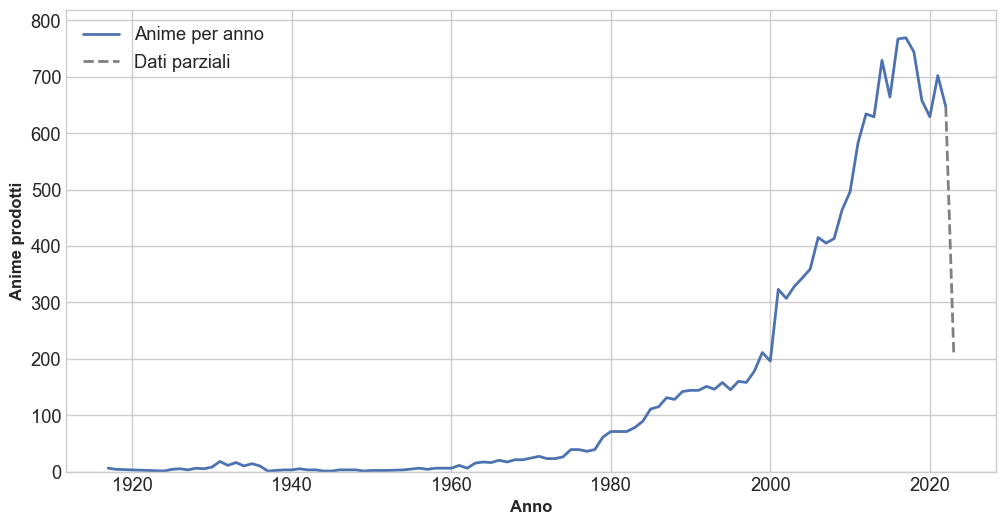

In [30]:
plt.figure(figsize=(12,6))
plt.plot(annuali.loc[:2022].index, annuali.loc[:2022].values, lw=2, label="Anime per anno")
plt.plot(annuali.loc[2022:].index, annuali.loc[2022:].values, lw=2, linestyle = "--", color = "gray", label = "Dati parziali")
plt.xlabel("Anno", fontsize = 12, fontweight = "bold")
plt.ylabel("Anime prodotti", fontsize = 12, fontweight = "bold")
plt.ylim(0, annuali.values.max()+ 50)
plt.legend()
plt.show()

In [31]:
%%html
<div>
    <h2 class = "t2">Popolarità media degli Anime nel tempo</h2>
</div>

In [32]:
pop = df_pulito.groupby("Start_year")["Members"].mean().sort_index()
pop

Start_year
1917          2358.0
1918         1162.25
1924          1410.0
1925           730.0
1926           999.0
            ...     
2019    87385.799392
2020    69204.203498
2021    71059.064103
2022    53729.187017
2023     61691.84689
Name: Members, Length: 99, dtype: Float64

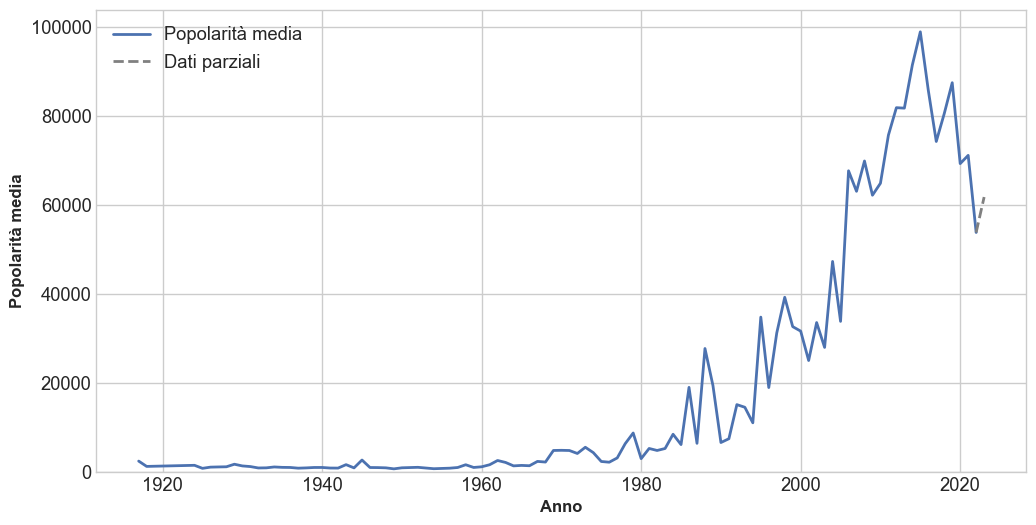

In [33]:
plt.figure(figsize=(12,6))
plt.plot(pop.loc[:2022].index, pop.loc[:2022].values, lw=2, label="Popolarità media")
plt.plot(pop.loc[2022:].index, pop.loc[2022:].values, lw=2, linestyle = "--", color = "gray", label = "Dati parziali")
plt.xlabel("Anno", fontsize=12, fontweight="bold")
plt.ylabel("Popolarità media", fontsize=12, fontweight="bold")
plt.ylim(0, int(pop.values.max() + 5000) ) 
plt.legend()
plt.show()

In [34]:
%%html
<div>
    <h2 class = "t2">Esiste correlazione tra voti e popolarità?</h2>
</div>

In [35]:
pearson_corr, _ = pearsonr(df_pulito["Score"], df_pulito["Members"])
spearman_corr, _ = spearmanr(df_pulito["Score"], df_pulito["Members"])
print("Pearson:",pearson_corr.round(2))
print("Spearman:", spearman_corr.round(2))

Pearson: 0.39
Spearman: 0.73


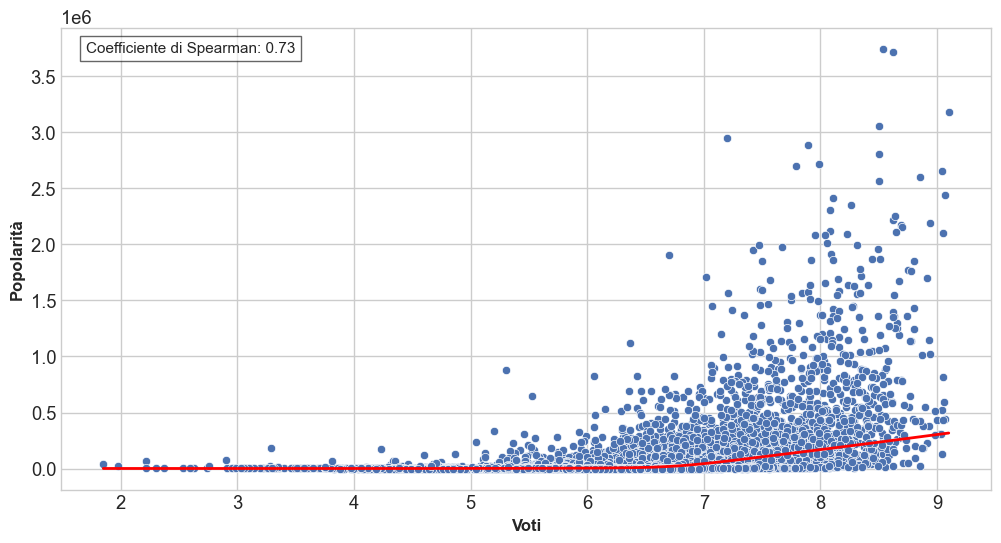

In [36]:
plt.figure(figsize=(12,6))
sns.scatterplot(data = df_pulito, x = "Score", y = "Members")
sns.regplot(data=df_pulito, x="Score", y="Members", lowess=True, scatter=False, color="red", line_kws={"lw":2})
plt.xlabel("Voti", fontsize = 12, fontweight = "bold")
plt.ylabel("Popolarità", fontsize = 12, fontweight = "bold")

plt.text(
    1.7,
    df_pulito["Members"].max()*0.99,
    f"Coefficiente di Spearman: {spearman_corr:.2}",
    fontsize=11,
    bbox=dict(facecolor="white", edgecolor="black", alpha=0.6)
)
plt.show()

In [37]:
%%html
<div>
    <h2 class = "t2">Come si è evoluta la varietà dei generi negli Anime?</b>
</div>

In [38]:
df_generi = df_pulito.explode("Genres")
df_generi = df_generi.dropna(subset=["Genres"])
df_generi = df_generi[df_generi["Genres"] != "UNKNOWN"]
df_generi

,anime_id,Score,Genres,Type,Rating,Rank,Popularity,Favorites,Scored By,Members,Title,Start_year,End_year
0,1,8.75,Action,TV,R - 17+ (violence & profanity),41,43,78525,914193,1771505,Cowboy Bebop,1998,1999
0,1,8.75,Award Winning,TV,R - 17+ (violence & profanity),41,43,78525,914193,1771505,Cowboy Bebop,1998,1999
0,1,8.75,Sci-Fi,TV,R - 17+ (violence & profanity),41,43,78525,914193,1771505,Cowboy Bebop,1998,1999
1,5,8.38,Action,Movie,R - 17+ (violence & profanity),189,602,1448,206248,360978,Cowboy Bebop: The Movie,2001,2001
1,5,8.38,Sci-Fi,Movie,R - 17+ (violence & profanity),189,602,1448,206248,360978,Cowboy Bebop: The Movie,2001,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24590,55355,5.99,Mystery,ONA,PG-13 - Teens 13 or older,8891,14796,1,129,518,Lee's Detective Agency: A Day in Lungmen - Hom...,2021,2021
24831,55647,6.29,Action,Special,PG-13 - Teens 13 or older,7480,14291,1,320,593,One Piece: Recapping Fierce Fights! The Counte...,2023,2023
24831,55647,6.29,Adventure,Special,PG-13 - Teens 13 or older,7480,14291,1,320,593,One Piece: Recapping Fierce Fights! The Counte...,2023,2023
24831,55647,6.29,Comedy,Special,PG-13 - Teens 13 or older,7480,14291,1,320,593,One Piece: Recapping Fierce Fights! The Counte...,2023,2023


In [39]:
df_generi.groupby("Start_year")["Genres"].nunique() 

Start_year
1917     2
1918     2
1924     1
1925     2
1926     3
        ..
2019    21
2020    21
2021    21
2022    20
2023    19
Name: Genres, Length: 98, dtype: int64

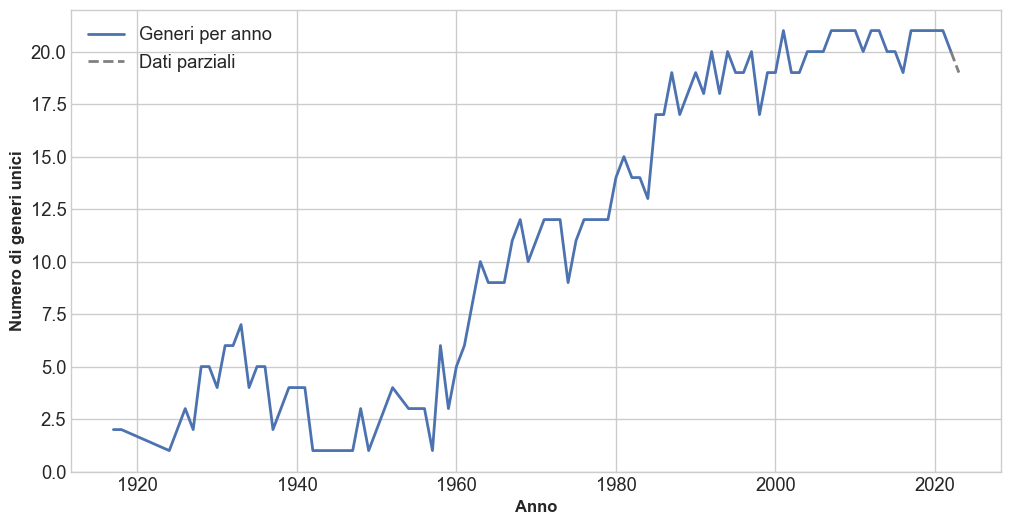

In [40]:
varieta_generi = (df_generi.groupby("Start_year")["Genres"].nunique())
plt.figure(figsize=(12,6))
plt.plot(varieta_generi.loc[:2022].index, varieta_generi.loc[:2022].values, lw=2, label="Generi per anno")
plt.plot(varieta_generi.loc[2022:].index, varieta_generi.loc[2022:].values, lw=2, linestyle = "--", color = "gray", label = "Dati parziali")
plt.xlabel("Anno", fontsize=12, fontweight="bold")
plt.ylabel("Numero di generi unici", fontsize=12, fontweight="bold")
plt.legend()
plt.show()


In [41]:
%%html
<div>
    <h2 class = "t2">Quali sono i generi più popolari?</h2>
</div>

In [42]:
df_pulito.explode("Genres")["Genres"].value_counts().head(10)

Genres
Comedy           5070
Action           3957
Fantasy          3291
Adventure        2672
Sci-Fi           2451
Drama            2200
Romance          1832
Hentai           1465
Supernatural     1274
Slice of Life    1184
Name: count, dtype: int64

In [43]:
(df_pulito.explode("Genres")["Genres"]
                .replace("UNKNOWN", np.nan).dropna().value_counts().reset_index(name="Tot"))

,Genres,Tot
0,Comedy,5070
1,Action,3957
2,Fantasy,3291
3,Adventure,2672
4,Sci-Fi,2451
5,Drama,2200
6,Romance,1832
7,Hentai,1465
8,Supernatural,1274
9,Slice of Life,1184


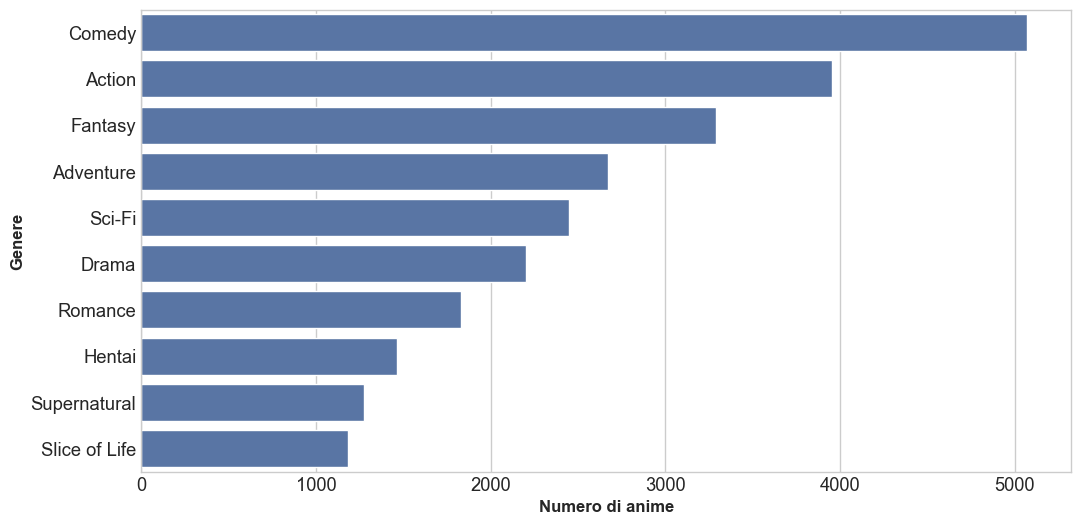

In [44]:
conta_generi = (df_pulito.explode("Genres")["Genres"]
                .replace("UNKNOWN", np.nan).dropna()
                .value_counts().head(10).reset_index(name="Tot"))


plt.figure(figsize=(12,6))
sns.barplot(data = conta_generi, x="Tot", y="Genres")
plt.xlabel("Numero di anime", fontsize=12, fontweight="bold")
plt.ylabel("Genere", fontsize=12, fontweight="bold")
plt.show()

In [45]:
%%html
<div>
    <h2 class = "t2">Come vengono distribuiti gli Anime nel tempo?</h2>
</div>

In [46]:
df_pulito["Type"].value_counts()

Type
TV         4482
OVA        3283
Movie      2475
Special    2039
ONA        1929
Music      1483
UNKNOWN       1
Name: count, dtype: int64

In [47]:
tipi_annuali = df_pulito.pivot_table(index = "Start_year", columns = "Type", values = "anime_id", aggfunc="count", fill_value = 0)
tipi_annuali

Type,Movie,Music,ONA,OVA,Special,TV,UNKNOWN
Start_year,,,,,,,
1917,6,0,0,0,0,0,0
1918,4,0,0,0,0,0,0
1924,1,0,0,0,0,0,0
1925,4,0,0,0,0,0,0
1926,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...
2019,86,105,167,60,66,174,0
2020,54,119,185,63,43,165,0
2021,66,127,215,53,53,188,0


In [48]:
#rimuoviamo UNKNOWN
tipi_annuali = tipi_annuali.drop(columns="UNKNOWN")

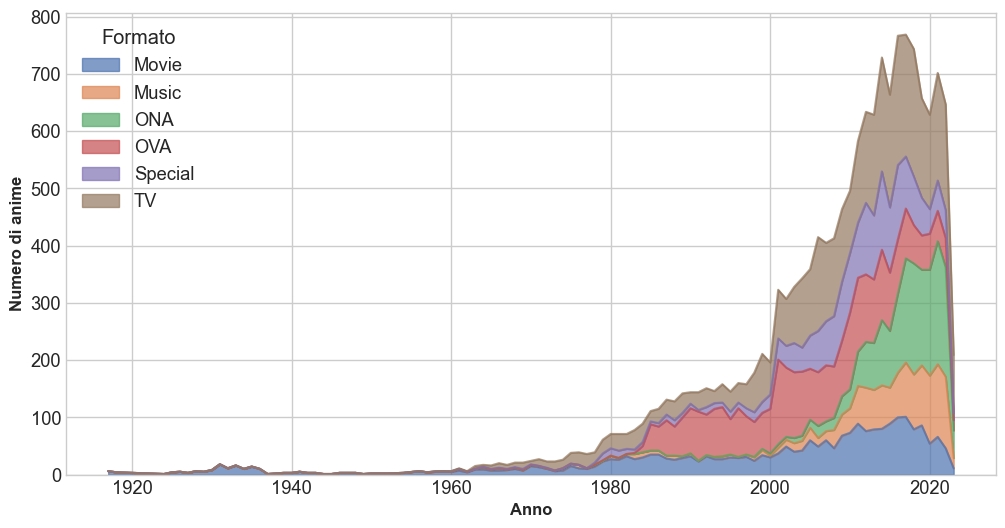

In [49]:
tipi_annuali.plot.area(figsize=(12,6), alpha=0.7)
plt.xlabel("Anno", fontsize=12, fontweight="bold")
plt.ylabel("Numero di anime", fontsize=12, fontweight="bold")
plt.legend(title="Formato")
plt.show()

<div>
    <h4><b>Nota:</b> i dati del 2023 sono parziali</h4>
</div>

In [50]:
%%html
<div>
    <h2 class = "t2">Come vengono percepiti a seconda del formato?</h2>
</div>

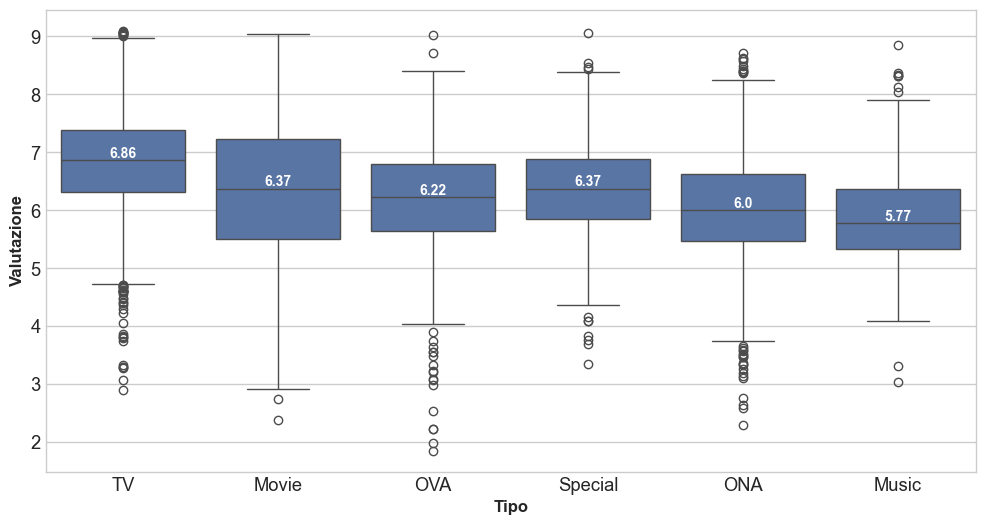

In [51]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=df_pulito[df_pulito["Type"] != "UNKNOWN"],x="Type", y="Score")

mediane = df_pulito[df_pulito["Type"] != "UNKNOWN"].groupby("Type")["Score"].median()

for t in ax.get_xticklabels(): #ax.getxticklabels()[i] -> Text(pos_x, pos_y, "etichetta")
    formato = t.get_text()                
    x = t.get_position()[0]             
    y = mediane.loc[formato]                    
    ax.text(x, y, y, ha="center", va="bottom", fontsize=10, fontweight="bold", color = "white")

plt.xlabel("Tipo", fontsize=12, fontweight="bold")
plt.ylabel("Valutazione", fontsize=12, fontweight="bold")
plt.show()


In [52]:
mediane

Type
Movie      6.37
Music      5.77
ONA        6.00
OVA        6.22
Special    6.37
TV         6.86
Name: Score, dtype: float64

In [53]:
ax.get_xticklabels()[0]

Text(0, 0, 'TV')

In [54]:
for t in ax.get_xticklabels():
    print(t, " --> ", t.get_position(), "," , t.get_text())

Text(0, 0, 'TV')  -->  (0, 0) , TV
Text(1, 0, 'Movie')  -->  (1, 0) , Movie
Text(2, 0, 'OVA')  -->  (2, 0) , OVA
Text(3, 0, 'Special')  -->  (3, 0) , Special
Text(4, 0, 'ONA')  -->  (4, 0) , ONA
Text(5, 0, 'Music')  -->  (5, 0) , Music


In [55]:
%%html
<div>
    <h2 class = "t2">Conclusioni</h2>
    <ul class = "clist">
        <li>Dagli anni ’80 la produzione e la popolarità degli Anime registrano una crescita rapida</li>
        <li>Anime popolari tendono ad avere valutazioni più alte, ma non è una regola ferrea</li>
        <li>I generi più adottati sono Comedy e Action</li>
        <li>Le serie TV tendono ad essere più apprezzate rispetto agli altri formati</li>
     </ul>

In [56]:
%%html
<div>
    <h1 class = "t1">Grazie per l'attenzione!</h1>
    <hr class = "d">
</div>